In [13]:
import yfinance as yf
import pandas as pd


In [14]:
#Anotamos el pnemotecnico, el cual lo encontraremos yendo a la pagina de yahooFinance y colocando en su barra de búsqueda el nombre de la empresa , por ejemplo, si ponemos 'Tesla' nos devuelve 'TSLA'

simbolo = 'TSLA'

#aqui usamos la funcion Ticker de yf, usando como parametro el pnemotecnico guardado en la variable
tesla = yf.Ticker(simbolo)

In [15]:
#Le pedimos el precio historico, usando la funcion history, cuyo unico parametro es period, le pediremos la mayor cantidad de tiempo que tenga en sus registros

tesla.history(period='max')


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0
...,...,...,...,...,...,...,...
2024-08-30 00:00:00-04:00,208.630005,214.570007,207.029999,214.110001,63370600,0.0,0.0
2024-09-03 00:00:00-04:00,215.259995,219.899994,209.639999,210.600006,76500900,0.0,0.0
2024-09-04 00:00:00-04:00,210.589996,222.220001,210.570007,219.410004,80651800,0.0,0.0


In [16]:
#tambien podemos pedir el balance general de la compania, pero solo los ultimos 4 balances...

tesla.balance_sheet


,2023-12-31,2022-12-31,2021-12-31,2020-12-31,2019-12-31
Treasury Shares Number,0.0,NaN,NaN,NaN,NaN
Ordinary Shares Number,3185000000.0,3164000000.0,3099000000.0,2880000000.0,NaN
Share Issued,3185000000.0,3164000000.0,3099000000.0,2880000000.0,NaN
Net Debt,NaN,NaN,NaN,NaN,5533000000.0
Total Debt,9573000000.0,5748000000.0,8873000000.0,13279000000.0,NaN
...,...,...,...,...,...
Cash Cash Equivalents And Short Term Investments,29094000000.0,22185000000.0,17707000000.0,19384000000.0,NaN
Other Short Term Investments,12696000000.0,5932000000.0,131000000.0,0.0,NaN
Cash And Cash Equivalents,16398000000.0,16253000000.0,17576000000.0,19384000000.0,NaN
Cash Equivalents,495000000.0,2288000000.0,9548000000.0,NaN,NaN


In [19]:
#tambien podemos bajar las recomendaciones de los analistas:

tesla.recommendations

,period,strongBuy,buy,hold,sell,strongSell
0,0m,4,4,8,6,1
1,-1m,8,14,17,7,4
2,-2m,7,12,21,6,4
3,-3m,7,12,22,6,4


In [22]:
#vamos a hacer un loop para ver varias empresas y trabajar con ellas: 

empresas = [
    'TSLS', #Tesla
    'GOOG', #Google
    'BTC-USD', #Bitcoin
    'META', #Meta
]

In [23]:
#iteramos y colocamos en esta variable:

recolector = []
for nemo in empresas:
    ticker = yf.Ticker(nemo)
    px = ticker.history(period='max')['Close']#solo pedimos la columna de Close, que seria la que tiene el precio completo de cierre, ahora cambiamos el nombre de esa columna para que sea mas facil reconocerla, ademas, al ser solo una columna, cambiará el dataframe a serie:
    px.name = nemo #como vemos en la linea anterior, creamos la variable px, que gralmente significa precio, pero ella llevaría el nombre de 'Close', por eso le cambiamos el nombre

    recolector += [px] #y aqui concatenamos la serie de px con el recolector original, el cual al comienzo tiene una lista vacia y se va llenando... cada elemento es una serie

#en una variable precios hacemos una funcion para que haga todo junto:     
precios = pd.concat(recolector, axis=1)#axis=1 es para que concatene las columnas,si no pusiéramos nada concatenaria por defecto las filas.... asi que es muy importante... 

#la concatenacion no es precio por precio, si no que por indices, haciendo todo el trabajo mucho mas facil... 

In [24]:
precios

,TSLS,GOOG,BTC-USD,META
Date,,,,
2004-08-19 04:00:00+00:00,NaN,2.496292,NaN,NaN
2004-08-20 04:00:00+00:00,NaN,2.694573,NaN,NaN
2004-08-23 04:00:00+00:00,NaN,2.721690,NaN,NaN
2004-08-24 04:00:00+00:00,NaN,2.608991,NaN,NaN
2004-08-25 04:00:00+00:00,NaN,2.637103,NaN,NaN
...,...,...,...,...
2024-09-05 00:00:00+00:00,NaN,NaN,56160.488281,NaN
2024-09-05 04:00:00+00:00,16.760000,158.600006,NaN,NaN
2024-09-06 00:00:00+00:00,NaN,NaN,53948.753906,NaN


### Graficando todo lo anterior: 
#### Código completo: 

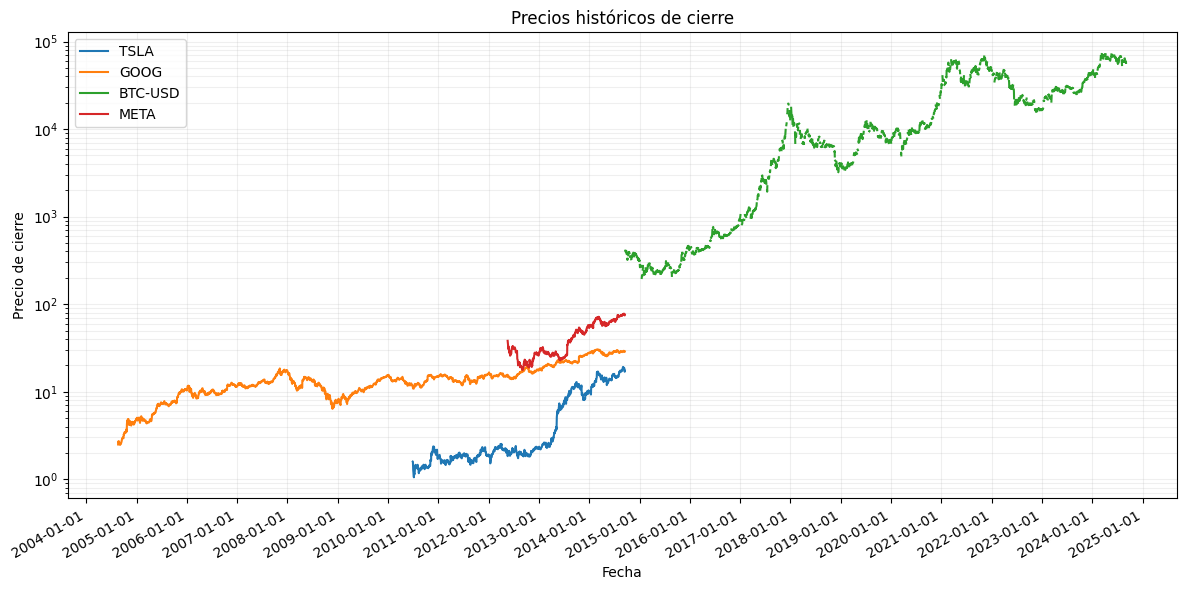

In [25]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
import yfinance as yf

# Código para obtener los datos
empresas = ['TSLA', 'GOOG', 'BTC-USD', 'META']
recolector = []
for nemo in empresas:
    ticker = yf.Ticker(nemo)
    px = ticker.history(period='max')['Close']
    px.name = nemo
    recolector.append(px)

precios = pd.concat(recolector, axis=1)

# Crear el gráfico
plt.figure(figsize=(12, 6))

for columna in precios.columns:
    plt.plot(precios.index, precios[columna], label=columna)

plt.title('Precios históricos de cierre')
plt.xlabel('Fecha')
plt.ylabel('Precio de cierre')
plt.legend()

# Formatear el eje x para mostrar las fechas de manera legible
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gcf().autofmt_xdate()  # Rota y alinea las etiquetas de fecha

# Ajustar la escala del eje y a logarítmica para mejor visualización
plt.yscale('log')

# Agregar una cuadrícula para facilitar la lectura
plt.grid(True, which="both", ls="-", alpha=0.2)

# Ajustar los márgenes
plt.tight_layout()

# Mostrar el gráfico
plt.show()

### Normalización: 
        Hemos tratado de hacer un codigo para que se vean las cuatro opciones juntas... para lo cual normalizamos... pero no estamos conformes con el resultado, lo dejamos igual para buscar una mejor solucion en el futuro: 

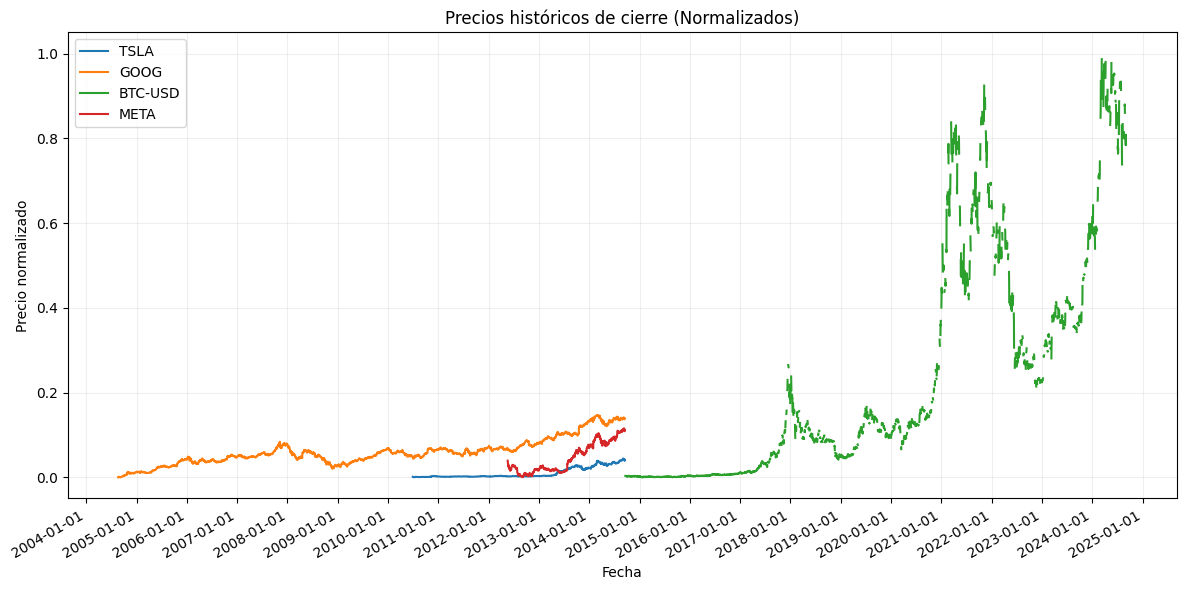

In [42]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
import yfinance as yf

# Código para obtener los datos
empresas = ['TSLA', 'GOOG', 'BTC-USD', 'META']
recolector = []
for nemo in empresas:
    ticker = yf.Ticker(nemo)
    px = ticker.history(period='max')['Close']
    px.name = nemo
    recolector.append(px)

precios = pd.concat(recolector, axis=1)

# Normalización Min-Max para escalar los valores entre 0 y 1
precios_normalizados = (precios - precios.min()) / (precios.max() - precios.min())

# Crear el gráfico
plt.figure(figsize=(12, 6))

for columna in precios_normalizados.columns:
    plt.plot(precios_normalizados.index, precios_normalizados[columna], label=columna)

plt.title('Precios históricos de cierre (Normalizados)')
plt.xlabel('Fecha')
plt.ylabel('Precio normalizado')
plt.legend()

# Formatear el eje x para mostrar las fechas de manera legible
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gcf().autofmt_xdate()  # Rota y alinea las etiquetas de fecha

# Agregar una cuadrícula para facilitar la lectura
plt.grid(True, which="both", ls="-", alpha=0.2)

# Ajustar los márgenes
plt.tight_layout()

# Mostrar el gráfico
plt.show()


# Modelo:

Y finalmente hemos creado una funcion para ver la tendencia y mas o menos tener una idea de en que momento se podria comprar o vender... aunque tampoco nos convence: 

[*********************100%%**********************]  1 of 1 completed


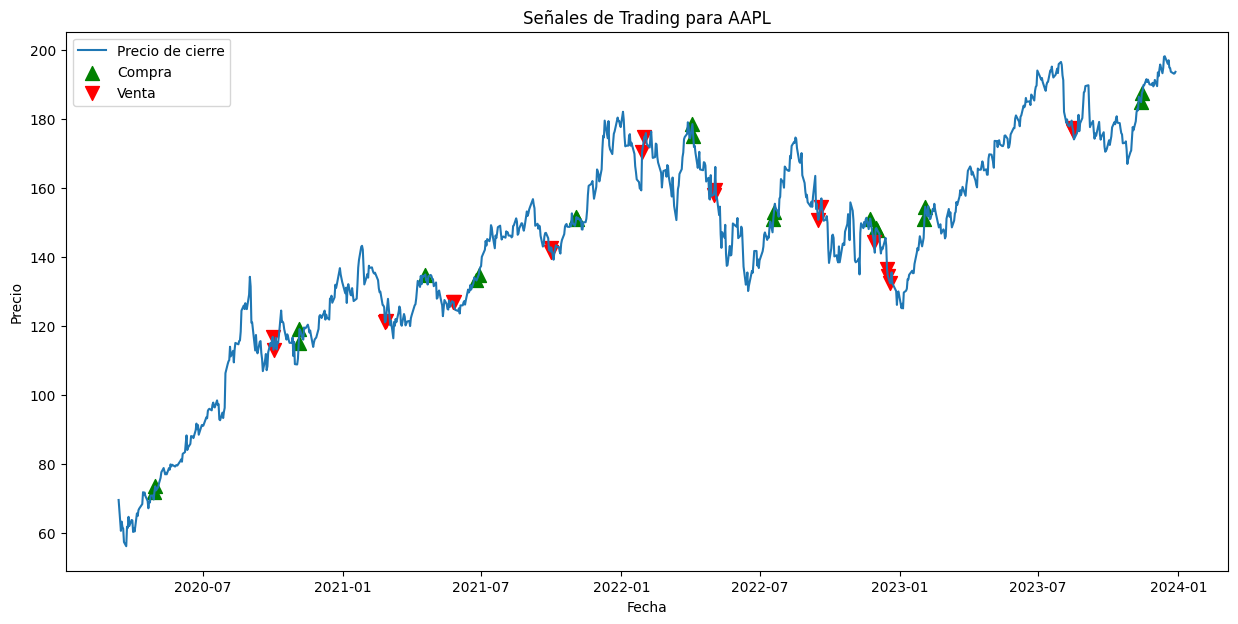

Número de señales de compra: 20
Número de señales de venta: 20


In [27]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

def get_data(symbol, start_date, end_date):
    data = yf.download(symbol, start=start_date, end=end_date)
    return data[['Close']].copy()  # Retornamos una copia explícita de 'Close'

def create_features(data):
    # Asegurémonos de que estamos trabajando con una copia
    df = data.copy()
    
    df['SMA20'] = df['Close'].rolling(window=20).mean()
    df['SMA50'] = df['Close'].rolling(window=50).mean()
    df['Signal'] = np.where(df['SMA20'] > df['SMA50'], 1, 0)
    df['Target'] = df['Signal'].shift(-1)
    return df.dropna()

# El resto de las funciones permanecen igual

# Parámetros
symbol = 'AAPL'  # Puedes cambiarlo por cualquier símbolo que desees
start_date = '2020-01-01'
end_date = '2023-12-31'

# Obtener datos
data = get_data(symbol, start_date, end_date)

# Crear características
data = create_features(data)

# Entrenar modelo
model, scaler = train_model(data)

# Obtener señales de trading
buy_signals, sell_signals = get_trading_signals(data, model, scaler)

# Visualizar resultados
plot_data_with_signals(data, buy_signals, sell_signals)

print("Número de señales de compra:", buy_signals.sum())
print("Número de señales de venta:", sell_signals.sum())

In [12]:
import yfinance as yf
import pandas as pd
from datetime import datetime, timedelta

def get_stock_data(symbol, start_date=None, end_date=None):
    if start_date is None:
        start_date = datetime.now() - timedelta(days=30)  # Último año
    if end_date is None:
        end_date = datetime.now()
    
    try:
        stock = yf.Ticker(symbol)
        df = stock.history(start=start_date, end=end_date)
        
        if df.empty:
            print(f"No se encontraron datos para {symbol} en el período especificado.")
            return None
        
        return df
    except Exception as e:
        print(f"Error al obtener datos para {symbol}: {e}")
        return None

# Uso
simbolo = 'PLTR'
datos_tesla = get_stock_data(simbolo)

if datos_tesla is not None:
    print(datos_tesla.head())
else:
    print("No se pudieron obtener los datos. Verifica el símbolo o intenta con un período diferente.")

                                Open       High        Low      Close  \
Date                                                                    
2024-08-08 00:00:00-04:00  27.040001  29.375000  26.690001  29.280001   
2024-08-09 00:00:00-04:00  29.280001  30.360001  29.100000  30.010000   
2024-08-12 00:00:00-04:00  30.219999  31.200001  29.270000  29.379999   
2024-08-13 00:00:00-04:00  29.789000  30.850000  29.559999  30.389999   
2024-08-14 00:00:00-04:00  30.620001  31.370001  30.330000  31.000000   

                             Volume  Dividends  Stock Splits  
Date                                                          
2024-08-08 00:00:00-04:00  96892900        0.0           0.0  
2024-08-09 00:00:00-04:00  88131100        0.0           0.0  
2024-08-12 00:00:00-04:00  67890300        0.0           0.0  
2024-08-13 00:00:00-04:00  57294200        0.0           0.0  
2024-08-14 00:00:00-04:00  49885600        0.0           0.0  
